<a href="https://colab.research.google.com/github/NathanDietrich/Artificial-Intelligence-and-Machine-Learning-portfolio/blob/main/STEP_7_Assignement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Documentation

# Finish Preprocess and data sequencing

In [1]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.4 MB/s eta 0:00:00


This code loads in the raw stock data and splits to x/y train and test sets and makes scalers for the x and y variables. The input for this is a raw.csv file

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import joblib

# Load data
df = pd.read_csv("raw.csv")  # Assumes raw.csv is uploaded in Colab's working directory

# Drop rows with missing target values (Close Price)
df = df.dropna(subset=['Close'])

# Fill missing sentiment values with the last available value (forward fill)
df[['sentiment_polarity', 'sentiment_subjectivity']] = df[['sentiment_polarity', 'sentiment_subjectivity']].ffill()

# Drop any remaining NaN values to handle edge cases
df = df.dropna()

# Convert Date to datetime and sort
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Select relevant features (excluding Date)
features = ['Open', 'High', 'Low', 'Volume', 'ATR', 'BB_High', 'BB_low', 'DC_High', 'DC_low',
            'KC_High', 'KC_Low', 'Williams_%R', 'sentiment_polarity', 'sentiment_subjectivity']
target = ['Close']

# Scaling
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_x.fit_transform(df[features])
y_scaled = scaler_y.fit_transform(df[target])

# Convert to sequences for LSTM/CNN
sequence_length = 30

X_seq, y_seq = [], []
for i in range(len(X_scaled) - sequence_length):
    X_seq.append(X_scaled[i:i+sequence_length])
    y_seq.append(y_scaled[i+sequence_length])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

# Save scalers (Colab sidebar)
joblib.dump(scaler_x, "scaler_x.pkl")
joblib.dump(scaler_y, "scaler_y.pkl")

# Save processed data to Colab sidebar
np.save("X_train.npy", X_train)
np.save("X_test.npy", X_test)
np.save("y_train.npy", y_train)
np.save("y_test.npy", y_test)

print("✅ Preprocessing complete. Files saved:")
print("- X_train.npy, X_test.npy, y_train.npy, y_test.npy")
print("- scaler_x.pkl, scaler_y.pkl")


✅ Preprocessing complete. Files saved:
- X_train.npy, X_test.npy, y_train.npy, y_test.npy
- scaler_x.pkl, scaler_y.pkl


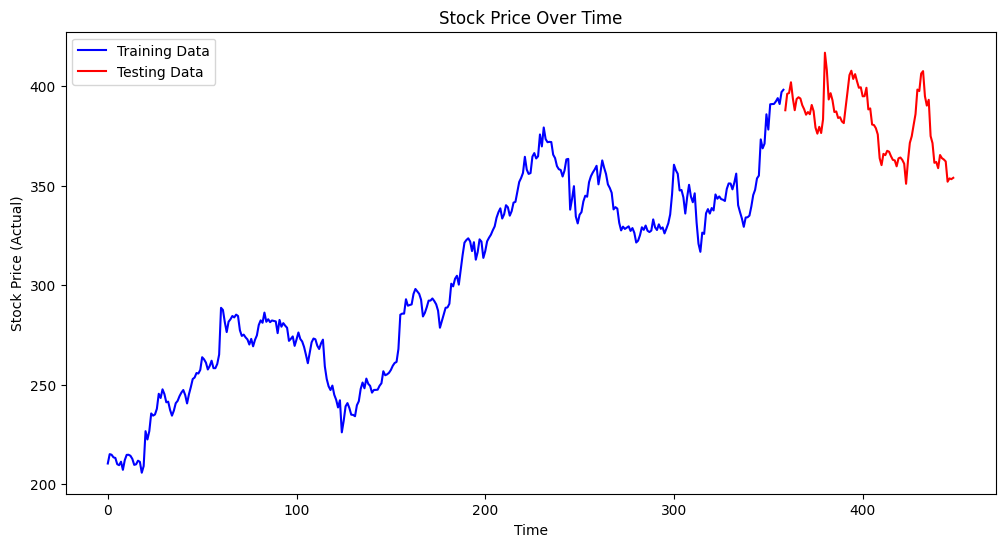

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import joblib

# Load preprocessed data from Colab sidebar
X_train = np.load("X_train.npy")
X_test = np.load("X_test.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")

# Load scalers
scaler_y = joblib.load("scaler_y.pkl")

# Unscale target values (stock prices)
y_train_unscaled = scaler_y.inverse_transform(y_train)
y_test_unscaled = scaler_y.inverse_transform(y_test)

# Plot actual stock price vs time
plt.figure(figsize=(12,6))
plt.plot(y_train_unscaled, label="Training Data", color="blue")
plt.plot(range(len(y_train_unscaled), len(y_train_unscaled) + len(y_test_unscaled)), y_test_unscaled, label="Testing Data", color="red")
plt.xlabel("Time")
plt.ylabel("Stock Price (Actual)")
plt.title("Stock Price Over Time")
plt.legend()
plt.show()


# RNN

This RNN model is designed for multi-step stock price forecasting, predicting three future time steps using a deep architecture with three stacked SimpleRNN layers. It employs Bayesian hyperparameter tuning to optimize the number of RNN units, dropout rates, dense layer size, and learning rate, aiming to enhance prediction accuracy over multiple future days.

In [ ]:
#NEXT STEP IS TO FIX THE FILE ORGANIZATIONS OF THE SAVED MODELS AND HYPERPARAMS

Trial 20 Complete [00h 00m 23s]
val_loss: 0.00744347320869565

Best val_loss So Far: 0.004031213000416756
Total elapsed time: 00h 07m 39s
✅ Best hyperparameters saved in rnn1!
Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 187ms/step - loss: 0.5292 - mae: 0.5502 - val_loss: 0.4149 - val_mae: 0.5600
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1714 - mae: 0.3403 - val_loss: 0.1992 - val_mae: 0.3841
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1158 - mae: 0.2740 - val_loss: 0.0723 - val_mae: 0.2293
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0742 - mae: 0.2167 - val_loss: 0.0424 - val_mae: 0.1631
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0672 - mae: 0.2045 - val_loss: 0.0210 - val_mae: 0.1252
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0532 - mae: 0.1844 - val_loss: 0.0133 - val_mae: 0.0949
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0482 - mae: 0.1759 - val_loss: 0.0224 - val_mae: 0.1

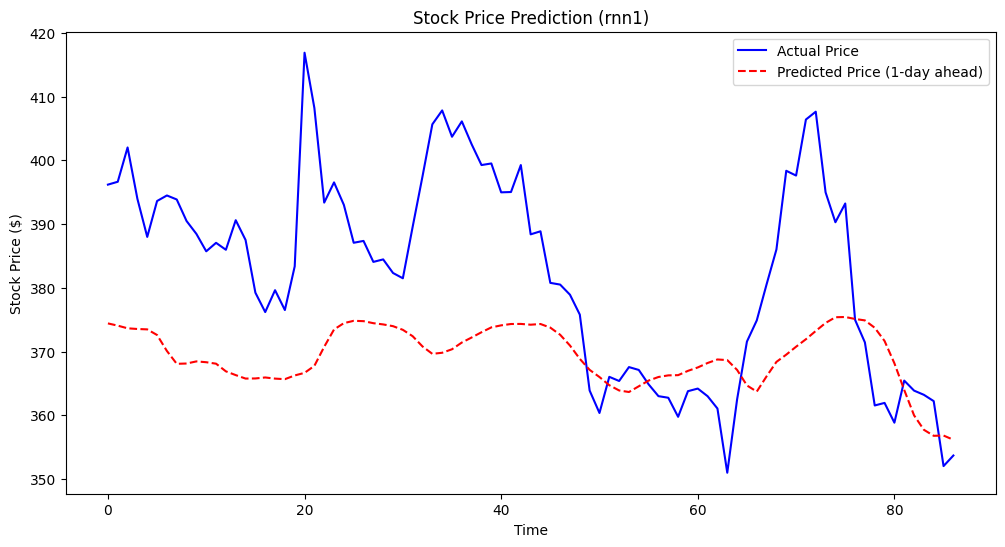


🎯 rnn1 Model Training & Prediction Complete! 🚀


In [7]:
#MultiStep RNN
import os
import numpy as np
import tensorflow as tf
import keras_tuner as kt
import matplotlib.pyplot as plt
import joblib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# === Define Model Save Path ===
rnn_folder = "rnn1"  # Change to rnn2, rnn3, etc. for future models
os.makedirs(rnn_folder, exist_ok=True)

# === Step 1: Load Preprocessed Data ===
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

# Load the correct scaler for stock prices
scaler_y = joblib.load("scaler_y.pkl")

print(f"✅ Data Loaded: X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"✅ X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# === Step 2: Create Multi-Step Target ===
FUTURE_STEPS = 3  # Number of days ahead to predict

def create_future_labels(y, future_steps):
    y_future = np.zeros((y.shape[0] - future_steps, future_steps))
    for i in range(y_future.shape[0]):
        y_future[i] = y[i + 1: i + 1 + future_steps].flatten()
    return y_future

y_train_future = create_future_labels(y_train, FUTURE_STEPS)
y_test_future = create_future_labels(y_test, FUTURE_STEPS)
X_train = X_train[:y_train_future.shape[0]]
X_test = X_test[:y_test_future.shape[0]]

print(f"✅ New y_train shape: {y_train_future.shape}, y_test shape: {y_test_future.shape}")

# === Step 3: Define RNN Model for Hyperparameter Tuning ===
def build_rnn_model(hp):
    model = Sequential([
        SimpleRNN(
            units=hp.Int('rnn_units_1', min_value=50, max_value=150, step=25),
            return_sequences=True,
            input_shape=(X_train.shape[1], X_train.shape[2])
        ),
        Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.4, step=0.1)),

        SimpleRNN(
            units=hp.Int('rnn_units_2', min_value=50, max_value=150, step=25),
            return_sequences=True
        ),
        Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.4, step=0.1)),

        SimpleRNN(
            units=hp.Int('rnn_units_3', min_value=50, max_value=150, step=25)
        ),
        Dropout(hp.Float('dropout_3', min_value=0.1, max_value=0.4, step=0.1)),

        Dense(units=hp.Int('dense_units', min_value=10, max_value=50, step=10), activation="relu"),
        Dense(units=FUTURE_STEPS)
    ])

    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss="mse",
        metrics=["mae"]
    )
    return model

# === Step 4: Initialize Bayesian Hyperparameter Tuner ===
tuner = kt.BayesianOptimization(
    build_rnn_model,
    objective="val_loss",
    max_trials=20,
    directory=os.path.join(rnn_folder, "tuning"),
    project_name="stock_forecasting"
)

# Perform Hyperparameter Search
tuner.search(X_train, y_train_future, epochs=50, validation_data=(X_test, y_test_future))

# Get Best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

# ✅ Save Best Hyperparameters in rnnX folder
best_hps_dict = {param: best_hps.get(param) for param in best_hps.values.keys()}
with open(os.path.join(rnn_folder, "best_hyperparameters.json"), "w") as f:
    json.dump(best_hps_dict, f)
print(f"✅ Best hyperparameters saved in {rnn_folder}!")

# === Step 5: Train the Best Model ===
BATCH_SIZE = 16
history = best_model.fit(
    X_train, y_train_future,
    epochs=100,
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test_future),
    verbose=1
)

# ✅ Save the Best Model in rnnX folder
best_model.save(os.path.join(rnn_folder, "best_rnn_model.keras"))
print(f"✅ Best RNN Model saved in {rnn_folder}!")

# === Step 6: Make Multi-Step Predictions ===
predictions = best_model.predict(X_test)

# === Step 7: Reverse Scale Predictions and Actual Values ===
def inverse_transform_multi_feature(scaler, data):
    """Properly inverse transform predictions to their actual stock price scale."""
    data = np.array(data).reshape(-1, 1)  # Reshape for transformation
    return scaler.inverse_transform(data)

# ✅ Unscale Predictions and Actual Prices
predictions_rescaled = inverse_transform_multi_feature(scaler_y, predictions[:, 0])
y_test_rescaled = inverse_transform_multi_feature(scaler_y, y_test_future[:, 0])

# === Step 8: Plot Multi-Step Predicted vs. Actual Prices ===
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Price", color="blue")
plt.plot(predictions_rescaled, label="Predicted Price (1-day ahead)", color="red", linestyle="dashed")
plt.title(f"Stock Price Prediction ({rnn_folder})")
plt.xlabel("Time")
plt.ylabel("Stock Price ($)")
plt.legend()
plt.show()

print(f"\n🎯 {rnn_folder} Model Training & Prediction Complete! 🚀")


This RNN model is optimized for single-step stock price prediction, using two SimpleRNN layers with tunable hyperparameters and a more extensive search space. It incorporates random search for hyperparameter tuning, early stopping for training efficiency, and saves the best model configuration for reproducibility.

Trial 10 Complete [00h 00m 32s]
val_loss: 0.0039296908071264625

Best val_loss So Far: 0.0020431560697034
Total elapsed time: 00h 05m 16s
✅ Best hyperparameters saved in rnn2!
Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - loss: 0.1649 - mae: 0.3162 - val_loss: 0.0115 - val_mae: 0.0904
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0454 - mae: 0.1718 - val_loss: 0.0205 - val_mae: 0.1218
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0336 - mae: 0.1435 - val_loss: 0.0130 - val_mae: 0.0956
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0248 - mae: 0.1250 - val_loss: 0.0148 - val_mae: 0.1082
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0219 - mae: 0.1159 - val_loss: 0.0080 - val_mae: 0.0744
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0191 - mae: 0.1134 - val_loss: 0.0079 - val_mae: 0.0775
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0182 - mae: 0.1056 - val_loss: 0.0085 - val_mae: 0.0792
Ep

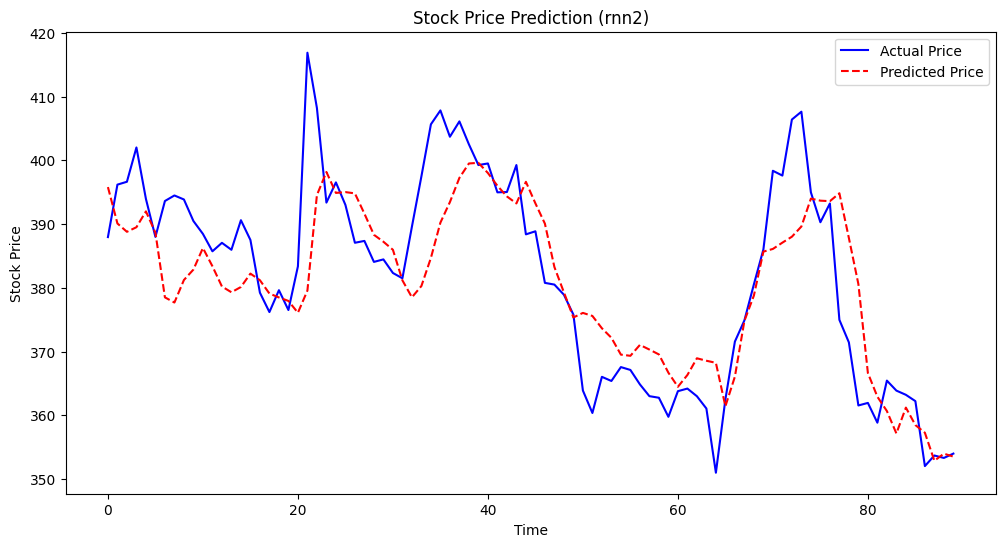


🎯 rnn2 Model Training & Prediction Complete! 🚀


In [8]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib
import json
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# === Define Model Save Path ===
rnn_folder = "rnn2"  # Change to rnn3, rnn4, etc. for future models
os.makedirs(rnn_folder, exist_ok=True)

# === Step 1: Load Preprocessed Data ===
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

# Load the correct scaler for stock prices
scaler_y = joblib.load("scaler_y.pkl")

print(f"✅ Data Loaded: X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"✅ X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# === Step 2: Hyperparameter Tuning ===
def build_rnn_model(hp):
    """Builds an improved RNN model with tunable hyperparameters."""
    model = Sequential([
        Input(shape=(X_train.shape[1], X_train.shape[2])),  # ✅ Fixed Input Layer

        # First RNN Layer
        SimpleRNN(units=hp.Choice('rnn_units', [75, 100, 125, 150]), return_sequences=True),
        Dropout(hp.Choice('dropout_rate', [0.05, 0.1, 0.2])),

        # Second RNN Layer
        SimpleRNN(units=hp.Choice('rnn_units_2', [75, 100, 125, 150])),
        Dropout(hp.Choice('dropout_rate_2', [0.05, 0.1, 0.2])),

        # Fully Connected Layers
        Dense(units=50, activation="relu"),
        Dense(units=1)
    ])

    # Compile Model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss="mse",
        metrics=["mae"]
    )

    return model

# ✅ Run More Trials
tuner = kt.RandomSearch(
    build_rnn_model,
    objective="val_loss",
    max_trials=10,
    executions_per_trial=2,
    directory=os.path.join(rnn_folder, "tuning"),
    project_name="stock_prediction_tuned"
)

# ✅ Perform Hyperparameter Search
tuner.search(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1)

# ✅ Get Best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# ✅ Save Best Hyperparameters in `rnn2/`
best_hps_dict = {param: best_hps.get(param) for param in best_hps.values.keys()}
with open(os.path.join(rnn_folder, "best_hyperparameters.json"), "w") as f:
    json.dump(best_hps_dict, f)
print(f"✅ Best hyperparameters saved in {rnn_folder}!")

# === Step 3: Train the Best Model with Early Stopping ===
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# ✅ Save the Best Model in `rnn2/`
best_model.save(os.path.join(rnn_folder, "best_rnn_model.keras"))
print(f"✅ Best RNN Model saved in {rnn_folder}!")

# === Step 4: Evaluate the Model ===
loss, mae = best_model.evaluate(X_test, y_test)
print(f"✅ Best Model Test Loss: {loss}")
print(f"✅ Best Model Test MAE: {mae}")

# === Step 5: Make Predictions ===
predictions = best_model.predict(X_test)

# === Step 6: Reverse Scale Predictions and Actual Values ===
def inverse_transform_single_feature(scaler, data):
    """
    Properly inverse transforms a single feature using the original scaler.
    Ensures that only the Close Price is inverse transformed.
    """
    data = np.array(data).reshape(-1, 1)  # Reshape for transformation
    return scaler.inverse_transform(data)

# ✅ Rescale Predictions and Actual Prices
predictions_rescaled = inverse_transform_single_feature(scaler_y, predictions)
y_test_rescaled = inverse_transform_single_feature(scaler_y, y_test)

# === Step 7: Plot Predicted vs. Actual Prices ===
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Price", color="blue")
plt.plot(predictions_rescaled, label="Predicted Price", color="red", linestyle="dashed")
plt.title(f"Stock Price Prediction ({rnn_folder})")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

print(f"\n🎯 {rnn_folder} Model Training & Prediction Complete! 🚀")


This RNN model employs three stacked SimpleRNN layers with Bayesian optimization to fine-tune hyperparameters, focusing on single-step stock price prediction. It improves hyperparameter saving, ensures correct batch size usage, and correctly rescales predictions using a modified inverse transformation method for accurate stock price reconstruction.

Trial 10 Complete [00h 00m 20s]
val_loss: 0.002907202346250415

Best val_loss So Far: 0.0027341353707015514
Total elapsed time: 00h 03m 18s
✅ Best hyperparameters saved in rnn3!
Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 177ms/step - loss: 0.1671 - mae: 0.3162 - val_loss: 0.0188 - val_mae: 0.1028
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0605 - mae: 0.1946 - val_loss: 0.0052 - val_mae: 0.0591
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0491 - mae: 0.1816 - val_loss: 0.0044 - val_mae: 0.0556
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0394 - mae: 0.1617 - val_loss: 0.0090 - val_mae: 0.0801
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0399 - mae: 0.1578 - val_loss: 0.0072 - val_mae: 0.0668
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0385 - mae: 0.1586 - val_loss: 0.0268 - val_mae: 0.1499
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0350 - mae: 0.1455 - val_loss: 0.0055 - val_mae: 0

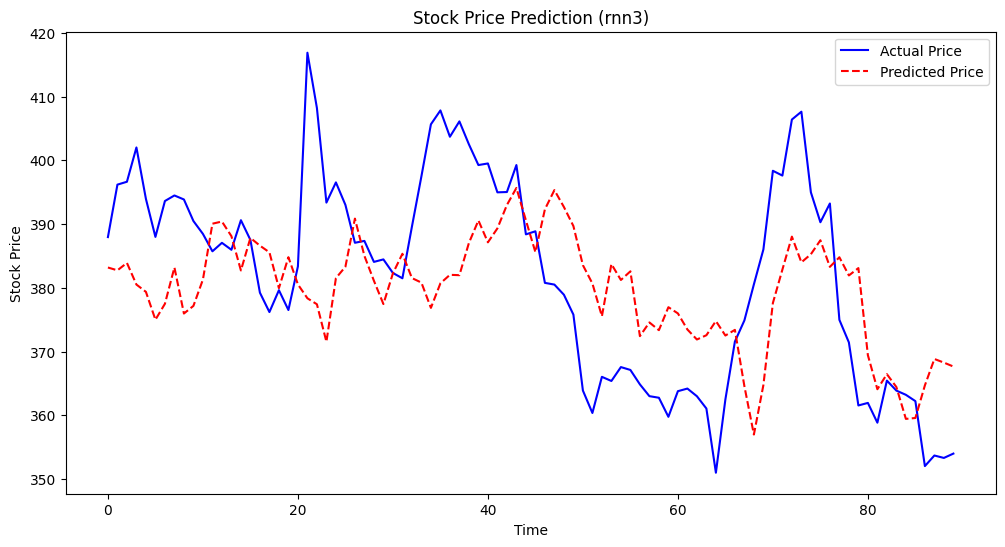


🎯 rnn3 Model Training & Prediction Complete! 🚀


In [9]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib
import json
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# === Define Model Save Path ===
rnn_folder = "rnn3"  # Change to rnn4, rnn5, etc. for future models
os.makedirs(rnn_folder, exist_ok=True)

# === Step 1: Load Preprocessed Data ===
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

# Load the correct scaler for stock prices
scaler_y = joblib.load("scaler_y.pkl")

print(f"✅ Data Loaded: X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"✅ X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# === Step 2: Hyperparameter Tuning ===
def build_rnn_model(hp):
    """Builds an RNN model with tunable hyperparameters."""
    model = Sequential([
        Input(shape=(X_train.shape[1], X_train.shape[2])),  # ✅ Fixed Input Layer

        # First RNN Layer
        SimpleRNN(units=hp.Choice('rnn_units_1', [50, 75, 100]), return_sequences=True),
        Dropout(hp.Choice('dropout_rate_1', [0.1, 0.2, 0.3])),

        # Second RNN Layer
        SimpleRNN(units=hp.Choice('rnn_units_2', [50, 75, 100]), return_sequences=True),
        Dropout(hp.Choice('dropout_rate_2', [0.1, 0.2, 0.3])),

        # Third RNN Layer
        SimpleRNN(units=hp.Choice('rnn_units_3', [50, 75, 100])),
        Dropout(hp.Choice('dropout_rate_3', [0.1, 0.2, 0.3])),

        # Fully Connected Layers
        Dense(units=25, activation="relu"),
        Dense(units=1)
    ])

    # Compile Model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss="mse",
        metrics=["mae"]
    )

    return model

# Initialize Hyperparameter Tuner
tuner = kt.BayesianOptimization(
    build_rnn_model,
    objective="val_loss",
    max_trials=10,
    directory=os.path.join(rnn_folder, "tuning"),
    project_name="stock_prediction"
)

# Perform Hyperparameter Search
tuner.search(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

# Get Best Model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

# ✅ Save Best Hyperparameters in `rnn3/`
best_hps_dict = {param: best_hps.get(param) for param in best_hps.values.keys()}
with open(os.path.join(rnn_folder, "best_hyperparameters.json"), "w") as f:
    json.dump(best_hps_dict, f)
print(f"✅ Best hyperparameters saved in {rnn_folder}!")

# ✅ Set Batch Size
BATCH_SIZE = 16

# === Step 3: Train the Best Model with Early Stopping ===
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = best_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# ✅ Save the Best Model in `rnn3/`
best_model.save(os.path.join(rnn_folder, "best_rnn_model.keras"))
print(f"✅ Best RNN Model saved in {rnn_folder}!")

# === Step 4: Evaluate the Model ===
loss, mae = best_model.evaluate(X_test, y_test)
print(f"✅ Best Model Test Loss: {loss}")
print(f"✅ Best Model Test MAE: {mae}")

# === Step 5: Make Predictions ===
predictions = best_model.predict(X_test)

# === Step 6: Reverse Scale Predictions and Actual Values ===
def inverse_transform_single_feature(scaler, data):
    """
    Properly inverse transforms a single feature using the original scaler.
    Ensures that only the Close Price is inverse transformed.
    """
    data = np.array(data).reshape(-1, 1)
    return scaler.inverse_transform(data)

# ✅ Rescale Predictions and Actual Prices
predictions_rescaled = inverse_transform_single_feature(scaler_y, predictions)
y_test_rescaled = inverse_transform_single_feature(scaler_y, y_test)

# === Step 7: Plot Predicted vs. Actual Prices ===
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Price", color="blue")
plt.plot(predictions_rescaled, label="Predicted Price", color="red", linestyle="dashed")
plt.title(f"Stock Price Prediction ({rnn_folder})")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

print(f"\n🎯 {rnn_folder} Model Training & Prediction Complete! 🚀")


# CNN

This CNN model consists of three Conv1D layers with tunable filter sizes, kernel sizes, and dropout rates, followed by MaxPooling1D for downsampling. It uses a single fully connected Dense layer before the output layer, optimizing hyperparameters via RandomSearch. The model focuses on efficient feature extraction but lacks batch normalization, which could impact stability and training efficiency.



Trial 15 Complete [00h 00m 05s]

Best val_loss So Far: 0.008217438589781523
Total elapsed time: 00h 05m 26s
✅ Best hyperparameters saved in cnn1!
Epoch 1/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0430 - mae: 0.1638 - val_loss: 0.0497 - val_mae: 0.2119
Epoch 2/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0519 - mae: 0.1811 - val_loss: 0.0245 - val_mae: 0.1438
Epoch 3/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0362 - mae: 0.1463 - val_loss: 0.0196 - val_mae: 0.1262
Epoch 4/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0315 - mae: 0.1393 - val_loss: 0.0211 - val_mae: 0.1305
Epoch 5/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0303 - mae: 0.1403 - val_loss: 0.0056 - val_mae: 0.0583
Epoch 6/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0258 - mae: 0.1269 - val_loss: 0.0213 - val_mae: 0.1341
Epoch 7/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0278 - mae: 0.1351 - val_loss: 0.0109 - val_mae: 0.0877
Epoch 8/250
23/23 ━━━━━━━━━━

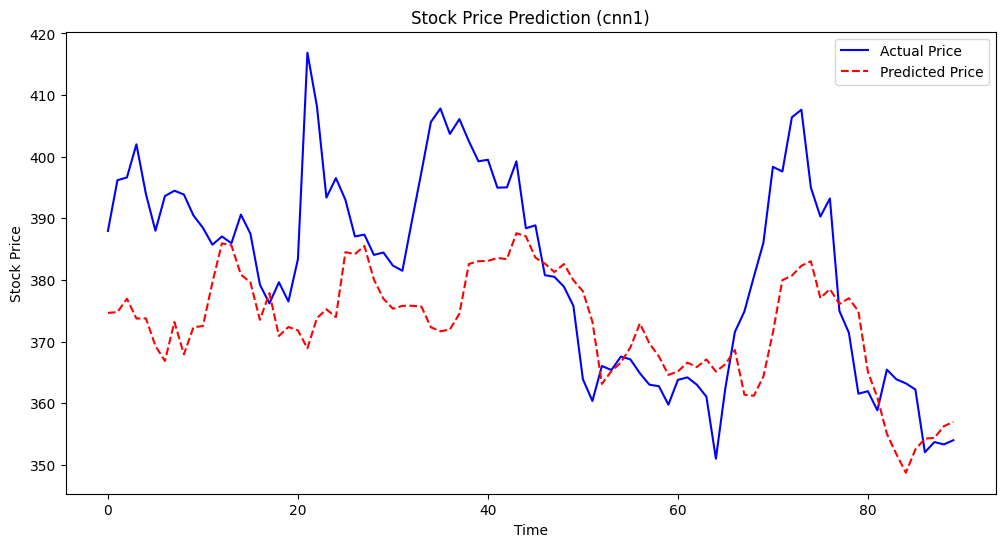


🎯 cnn1 Model Training & Prediction Complete! 🚀


In [10]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib
import json
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# === Define Model Save Path ===
cnn_folder = "cnn1"  # Change to cnn2, cnn3, etc. for future models
os.makedirs(cnn_folder, exist_ok=True)

# === Step 1: Load Preprocessed Data ===
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

# Load the correct scaler for stock prices
scaler_y = joblib.load("scaler_y.pkl")

print(f"✅ Data Loaded: X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"✅ X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# === Step 2: Hyperparameter Tuning ===
def build_cnn_model(hp):
    """Builds an improved CNN model with tunable hyperparameters."""
    model = Sequential([
        Input(shape=(X_train.shape[1], X_train.shape[2])),

        # First Convolutional Layer
        Conv1D(filters=hp.Choice('filters_1', [32, 64, 128]),
               kernel_size=hp.Choice('kernel_size_1', [3, 5, 7]),
               activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(hp.Choice('dropout_rate_1', [0.1, 0.2])),

        # Second Convolutional Layer
        Conv1D(filters=hp.Choice('filters_2', [32, 64, 128]),
               kernel_size=hp.Choice('kernel_size_2', [3, 5, 7]),
               activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(hp.Choice('dropout_rate_2', [0.1, 0.2])),

        # Third Convolutional Layer
        Conv1D(filters=hp.Choice('filters_3', [32, 64, 128]),
               kernel_size=hp.Choice('kernel_size_3', [3, 5]),
               activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(hp.Choice('dropout_rate_3', [0.1, 0.2])),

        # Flatten for Dense Layers
        Flatten(),

        # Dense Layers
        Dense(units=hp.Choice('dense_units_1', [64, 128, 256]), activation="relu"),
        Dropout(hp.Choice('dropout_rate_dense', [0.1, 0.2])),

        # Output Layer
        Dense(units=1)
    ])

    # Compile Model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss="mse",
        metrics=["mae"]
    )

    return model

# ✅ Run More Trials
tuner = kt.RandomSearch(
    build_cnn_model,
    objective="val_loss",
    max_trials=15,
    executions_per_trial=2,
    directory=os.path.join(cnn_folder, "tuning"),
    project_name="stock_prediction_tuned"
)

# ✅ Perform Hyperparameter Search
tuner.search(X_train, y_train, epochs=40, validation_data=(X_test, y_test), verbose=1)

# ✅ Get Best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# ✅ Save Best Hyperparameters in `cnn1/`
best_hps_dict = {param: best_hps.get(param) for param in best_hps.values.keys()}
with open(os.path.join(cnn_folder, "best_hyperparameters.json"), "w") as f:
    json.dump(best_hps_dict, f)
print(f"✅ Best hyperparameters saved in {cnn_folder}!")

# ✅ Set Batch Size
BATCH_SIZE = 16

# === Step 3: Train the Best Model with Early Stopping ===
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = best_model.fit(
    X_train, y_train,
    epochs=250,
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# ✅ Save the Best Model in `cnn1/`
best_model.save(os.path.join(cnn_folder, "best_cnn_model.keras"))
print(f"✅ Best CNN Model saved in {cnn_folder}!")

# === Step 4: Evaluate the Model ===
loss, mae = best_model.evaluate(X_test, y_test)
print(f"✅ Best Model Test Loss: {loss}")
print(f"✅ Best Model Test MAE: {mae}")

# === Step 5: Make Predictions ===
predictions = best_model.predict(X_test)

# === Step 6: Reverse Scale Predictions and Actual Values ===
def inverse_transform_single_feature(scaler, data):
    """
    Properly inverse transforms a single feature using the original scaler.
    Ensures that only the Close Price is inverse transformed.
    """
    data = np.array(data).reshape(-1, 1)
    return scaler.inverse_transform(data)

# ✅ Rescale Predictions and Actual Prices
predictions_rescaled = inverse_transform_single_feature(scaler_y, predictions)
y_test_rescaled = inverse_transform_single_feature(scaler_y, y_test)

# === Step 7: Plot Predicted vs. Actual Prices ===
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Price", color="blue")
plt.plot(predictions_rescaled, label="Predicted Price", color="red", linestyle="dashed")
plt.title(f"Stock Price Prediction ({cnn_folder})")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

print(f"\n🎯 {cnn_folder} Model Training & Prediction Complete! 🚀")


This enhanced CNN model builds on cnn1 by adding BatchNormalization after each convolutional layer, helping to stabilize training and improve generalization. It also includes an extra dense layer for deeper feature extraction and increases both the batch size and hyperparameter tuning trials for better performance. The longer training time and additional layers make it more robust for capturing complex stock price patterns compared to cnn1.

Trial 20 Complete [00h 01m 12s]
val_loss: 0.08506716663638751

Best val_loss So Far: 0.017525237053632736
Total elapsed time: 00h 23m 11s
✅ Best hyperparameters saved in cnn2!
Epoch 1/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 374ms/step - loss: 0.5678 - mae: 0.6092 - val_loss: 0.5639 - val_mae: 0.7475
Epoch 2/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5023 - mae: 0.5607 - val_loss: 0.5524 - val_mae: 0.7395
Epoch 3/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4534 - mae: 0.5110 - val_loss: 0.5357 - val_mae: 0.7279
Epoch 4/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3507 - mae: 0.4614 - val_loss: 0.5181 - val_mae: 0.7154
Epoch 5/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4114 - mae: 0.4979 - val_loss: 0.4905 - val_mae: 0.6956
Epoch 6/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3438 - mae: 0.4455 - val_loss: 0.5068 - val_mae: 0.7073
Epoch 7/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3201 - mae: 0.4471 - val_loss: 0.5351 - val_mae: 0.7270
E

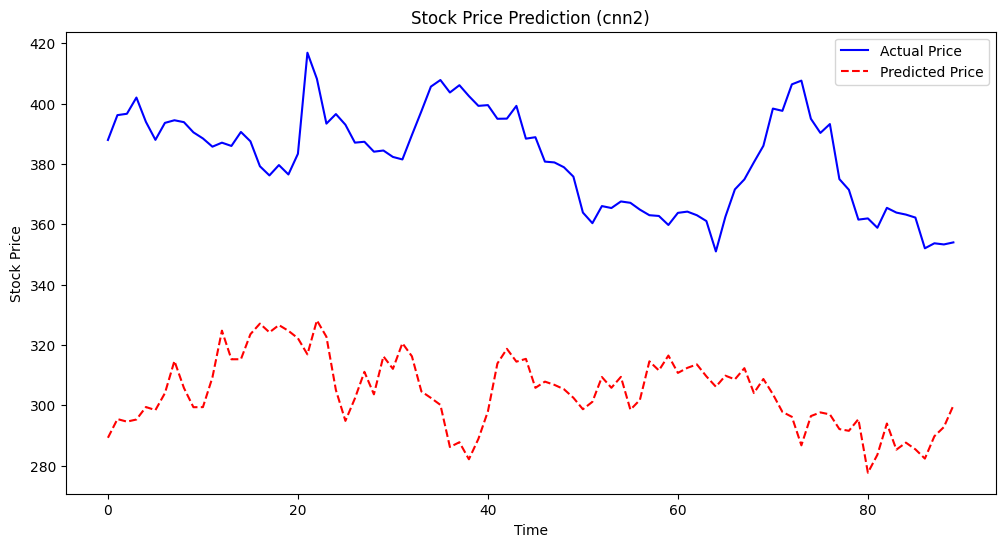


🎯 cnn2 Model Training & Prediction Complete! 🚀


In [13]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib
import json
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# === Define Model Save Path ===
cnn_folder = "cnn2"
os.makedirs(cnn_folder, exist_ok=True)

# === Step 1: Load Preprocessed Data ===
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

# Load the correct scaler for stock prices
scaler_y = joblib.load("scaler_y.pkl")

print(f"✅ Data Loaded: X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"✅ X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Maximum valid kernel size based on sequence length
MAX_KERNEL_SIZE = min(X_train.shape[1] // 2, 5)  # Ensure kernel size isn't larger than half the sequence length

# === Step 2: Hyperparameter Tuning ===
def build_cnn_model(hp):
    """Builds a CNN model with dynamic kernel sizes to prevent shape errors."""
    model = Sequential([
        Input(shape=(X_train.shape[1], X_train.shape[2])),

        # First Convolutional Layer
        Conv1D(filters=hp.Choice('filters_1', [64, 128, 256]),
               kernel_size=hp.Choice('kernel_size_1', [3, MAX_KERNEL_SIZE]),
               activation='relu', padding="same"),
        MaxPooling1D(pool_size=2),
        BatchNormalization(),
        Dropout(hp.Choice('dropout_rate_1', [0.1, 0.2, 0.3])),

        # Second Convolutional Layer
        Conv1D(filters=hp.Choice('filters_2', [64, 128, 256]),
               kernel_size=hp.Choice('kernel_size_2', [3, min(MAX_KERNEL_SIZE, 4)]),
               activation='relu', padding="same"),
        MaxPooling1D(pool_size=2),
        BatchNormalization(),
        Dropout(hp.Choice('dropout_rate_2', [0.1, 0.2, 0.3])),

        # Third Convolutional Layer
        Conv1D(filters=hp.Choice('filters_3', [64, 128, 256]),
               kernel_size=hp.Choice('kernel_size_3', [3, min(MAX_KERNEL_SIZE, 3)]),
               activation='relu', padding="same"),
        MaxPooling1D(pool_size=2, padding="same"),  # Use "same" padding to avoid reducing size too much
        BatchNormalization(),
        Dropout(hp.Choice('dropout_rate_3', [0.1, 0.2, 0.3])),

        # Flatten for Dense Layers
        Flatten(),

        # Fully Connected Layers
        Dense(units=hp.Choice('dense_units_1', [128, 256, 512]), activation="relu"),
        Dropout(hp.Choice('dropout_rate_dense_1', [0.1, 0.2])),
        Dense(units=hp.Choice('dense_units_2', [64, 128, 256]), activation="relu"),
        Dropout(hp.Choice('dropout_rate_dense_2', [0.1, 0.2])),

        # Output Layer
        Dense(units=1)
    ])

    # Compile Model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss="mse",
        metrics=["mae"]
    )

    return model

# ✅ Run More Trials for Better Tuning
tuner = kt.RandomSearch(
    build_cnn_model,
    objective="val_loss",
    max_trials=20,
    executions_per_trial=3,
    directory=os.path.join(cnn_folder, "tuning"),
    project_name="stock_prediction_tuned"
)

# ✅ Perform Hyperparameter Search
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

# ✅ Get Best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# ✅ Save Best Hyperparameters in `cnn2/`
best_hps_dict = {param: best_hps.get(param) for param in best_hps.values.keys()}
with open(os.path.join(cnn_folder, "best_hyperparameters.json"), "w") as f:
    json.dump(best_hps_dict, f)
print(f"✅ Best hyperparameters saved in {cnn_folder}!")

# ✅ Set Batch Size
BATCH_SIZE = 32

# === Step 3: Train the Best Model with Early Stopping ===
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    X_train, y_train,
    epochs=300,
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# ✅ Save the Best Model in `cnn2/`
best_model.save(os.path.join(cnn_folder, "best_cnn_model.keras"))
print(f"✅ Best CNN Model saved in {cnn_folder}!")

# === Step 4: Evaluate the Model ===
loss, mae = best_model.evaluate(X_test, y_test)
print(f"✅ Best Model Test Loss: {loss}")
print(f"✅ Best Model Test MAE: {mae}")

# === Step 5: Make Predictions ===
predictions = best_model.predict(X_test)

# === Step 6: Reverse Scale Predictions and Actual Values ===
def inverse_transform_single_feature(scaler, data):
    """Properly inverse transforms a single feature using the original scaler."""
    data = np.array(data).reshape(-1, 1)
    return scaler.inverse_transform(data)

# ✅ Rescale Predictions and Actual Prices
predictions_rescaled = inverse_transform_single_feature(scaler_y, predictions)
y_test_rescaled = inverse_transform_single_feature(scaler_y, y_test)

# === Step 7: Plot Predicted vs. Actual Prices ===
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Price", color="blue")
plt.plot(predictions_rescaled, label="Predicted Price", color="red", linestyle="dashed")
plt.title(f"Stock Price Prediction ({cnn_folder})")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

print(f"\n🎯 {cnn_folder} Model Training & Prediction Complete! 🚀")


✅ Data Loaded: y_train shape: (359,), y_test shape: (90,)
📉 ADF Test Statistic: -0.8374, p-value: 0.8079
⚠️ Data is NOT stationary. Applying differencing (d=1)...
🔍 Searching for the best (p, d, q) parameters using Grid Search...
✅ New Best ARIMA(0, 0, 0) with MSE: 0.0010
✅ New Best ARIMA(0, 0, 1) with MSE: 0.0010


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


🏆 Best ARIMA Hyperparameters: {'p': 0, 'd': 0, 'q': 1}
✅ Best hyperparameters saved in arima1!
🚀 Training Best ARIMA(0, 0, 1) Model...
✅ Best ARIMA Model saved in arima1!
✅ ARIMA Model MAE: 215.9477, MSE: 46871.7154


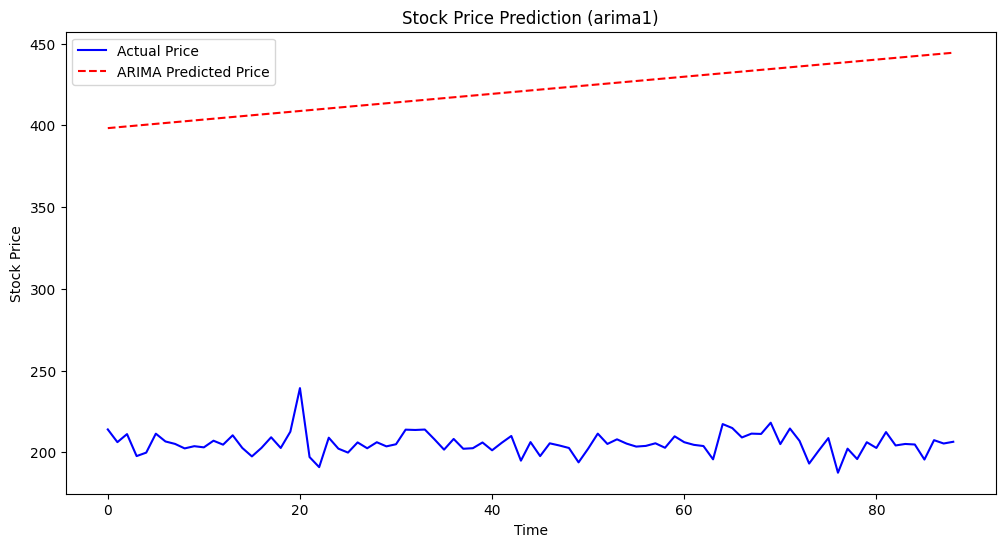

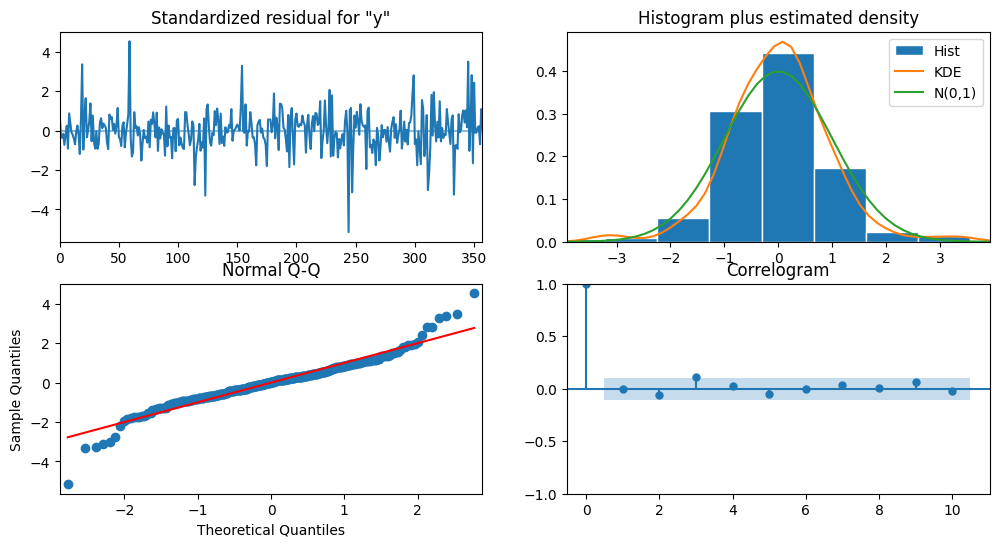


🎯 arima1 Model Training & Prediction Complete! 🚀


In [20]:
import os
import numpy as np
import joblib
import json
import itertools
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error

# === Define Model Save Path ===
arima_folder = "arima1"
os.makedirs(arima_folder, exist_ok=True)

# === Step 1: Load Preprocessed Data ===
y_train = np.load("y_train.npy").flatten()
y_test = np.load("y_test.npy").flatten()

# Load the correct scaler for stock prices
scaler_y = joblib.load("scaler_y.pkl")

print(f"✅ Data Loaded: y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

# === Step 2: Check & Ensure Stationarity ===
def check_stationarity(timeseries):
    """Performs the Augmented Dickey-Fuller test for stationarity."""
    result = adfuller(timeseries)
    print(f"📉 ADF Test Statistic: {result[0]:.4f}, p-value: {result[1]:.4f}")
    return result[1] < 0.05  # If p-value < 0.05, data is stationary

# Apply differencing if necessary
if not check_stationarity(y_train):
    print("⚠️ Data is NOT stationary. Applying differencing (d=1)...")
    y_train_diff = np.diff(y_train)  # First-order differencing
    y_test_diff = np.diff(y_test)
    differenced = True
else:
    print("✅ Data is already stationary. No differencing needed.")
    y_train_diff, y_test_diff = y_train, y_test
    differenced = False

# === Step 3: Hyperparameter Tuning via Grid Search ===
print("🔍 Searching for the best (p, d, q) parameters using Grid Search...")

# Define reduced hyperparameter search space for stability
p_values = [0, 1]
d_values = [0, 1]
q_values = [0, 1]

best_score, best_cfg = float("inf"), None

# Grid Search for Best (p, d, q)
for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        model = ARIMA(y_train_diff, order=(p, d, q))
        model_fit = model.fit(method_kwargs={"maxiter": 300})
        predictions = model_fit.forecast(steps=len(y_test_diff))
        mse = mean_squared_error(y_test_diff, predictions)

        if mse < best_score:
            best_score, best_cfg = mse, (p, d, q)
            print(f"✅ New Best ARIMA({p}, {d}, {q}) with MSE: {mse:.4f}")

    except Exception as e:
        print(f"⚠️ Skipping ARIMA({p}, {d}, {q}) due to error: {e}")
        continue

best_p, best_d, best_q = best_cfg
best_hps = {"p": best_p, "d": best_d, "q": best_q}
print(f"🏆 Best ARIMA Hyperparameters: {best_hps}")

# ✅ Save Best Hyperparameters in `arima1/`
with open(os.path.join(arima_folder, "best_hyperparameters.json"), "w") as f:
    json.dump(best_hps, f)
print(f"✅ Best hyperparameters saved in {arima_folder}!")

# === Step 4: Fit the Best ARIMA Model ===
print(f"🚀 Training Best ARIMA({best_p}, {best_d}, {best_q}) Model...")
arima_model = ARIMA(y_train_diff, order=(best_p, best_d, best_q))
arima_fit = arima_model.fit(method_kwargs={"maxiter": 300})

# ✅ Save the Best Model in `arima1/`
joblib.dump(arima_fit, os.path.join(arima_folder, "best_arima_model.pkl"))
print(f"✅ Best ARIMA Model saved in {arima_folder}!")

# === Step 5: Make Predictions ===
arima_predictions = arima_fit.forecast(steps=len(y_test_diff))

# === Step 6: Properly Reverse Differencing ===
def reverse_differencing(predictions, last_value):
    """Restores original price levels after differencing."""
    if differenced:
        return np.r_[last_value, predictions].cumsum()[:-1]  # Remove extra last value
    return predictions

arima_predictions_restored = reverse_differencing(arima_predictions, y_train[-1])

# === Step 7: Reverse Scale Predictions and Actual Values ===
def inverse_transform_single_feature(scaler, data):
    """Properly inverse transforms a single feature using the original scaler."""
    data = np.array(data).reshape(-1, 1)
    return scaler.inverse_transform(data).flatten()

# ✅ Rescale Predictions and Actual Prices
predictions_rescaled = inverse_transform_single_feature(scaler_y, arima_predictions_restored)
y_test_rescaled = inverse_transform_single_feature(scaler_y, y_test_diff)  # Adjusted length

# === Step 8: Ensure Matching Lengths ===
min_length = min(len(y_test_rescaled), len(predictions_rescaled))
y_test_rescaled = y_test_rescaled[:min_length]
predictions_rescaled = predictions_rescaled[:min_length]

# === Step 9: Evaluate Performance ===
mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)
mse = mean_squared_error(y_test_rescaled, predictions_rescaled)
print(f"✅ ARIMA Model MAE: {mae:.4f}, MSE: {mse:.4f}")

# === Step 10: Plot ARIMA Predictions vs. Actual Prices ===
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Price", color="blue")
plt.plot(predictions_rescaled, label="ARIMA Predicted Price", color="red", linestyle="dashed")
plt.title(f"Stock Price Prediction ({arima_folder})")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# === Step 11: ARIMA Diagnostics Plot ===
arima_fit.plot_diagnostics(figsize=(12, 6))
plt.show()

print(f"\n🎯 {arima_folder} Model Training & Prediction Complete! 🚀")


#LSTM

LSTM1 is a standard two-layer LSTM model designed to capture sequential stock price patterns. It includes a single dense layer for feature extraction and dropout for regularization. This model serves as the baseline for performance comparisons with more advanced architectures.

Trial 10 Complete [00h 00m 30s]
val_loss: 0.004938520025461912

Best val_loss So Far: 0.002559978049248457
Total elapsed time: 00h 05m 01s
✅ Best hyperparameters saved in lstm1!
Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0674 - mae: 0.1922 - val_loss: 0.0093 - val_mae: 0.0807
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0096 - mae: 0.0732 - val_loss: 0.0121 - val_mae: 0.0885
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0062 - mae: 0.0609 - val_loss: 0.0121 - val_mae: 0.0925
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0041 - mae: 0.0501 - val_loss: 0.0044 - val_mae: 0.0506
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0051 - mae: 0.0548 - val_loss: 0.0035 - val_mae: 0.0465
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0048 - mae: 0.0545 - val_loss: 0.0041 - val_mae: 0.0483
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0035 - mae: 0.0472 - val_loss: 0.0040 - val_mae: 0.0

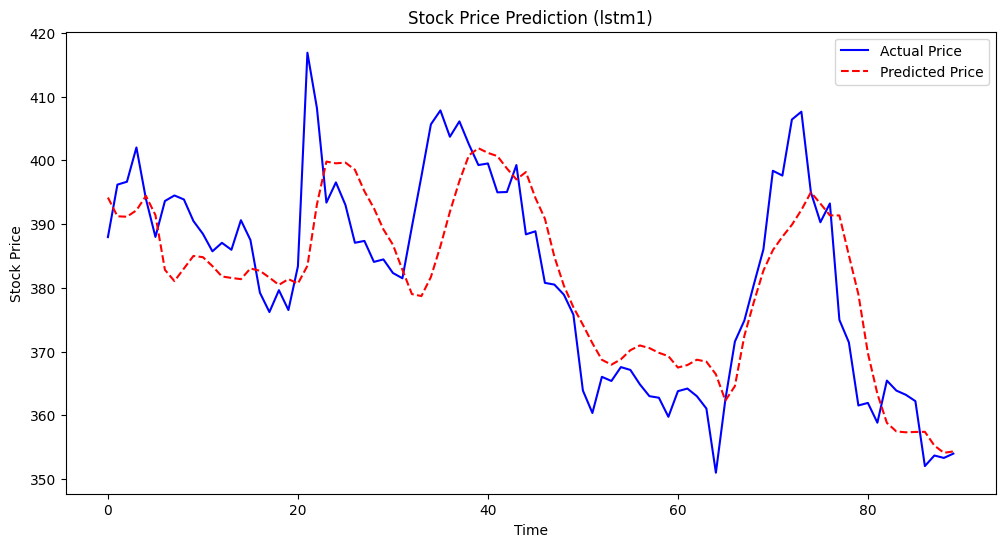


🎯 lstm1 Model Training & Prediction Complete! 🚀


In [21]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib
import json
import keras_tuner as kt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# === Define Model Save Path ===
lstm_folder = "lstm1"
os.makedirs(lstm_folder, exist_ok=True)

# === Step 1: Load Preprocessed Data ===
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

# Load the correct scaler for stock prices
scaler_y = joblib.load("scaler_y.pkl")

print(f"✅ Data Loaded: X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"✅ X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# === Step 2: Hyperparameter Tuning ===
def build_lstm_model(hp):
    """Builds an LSTM model."""
    inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

    # LSTM Layers
    lstm = LSTM(units=hp.Choice('lstm_units', [50, 75, 100]), return_sequences=True)(inputs)
    lstm = LSTM(units=hp.Choice('lstm_units_2', [50, 75, 100]))(lstm)

    # Fully Connected Layers
    dense = Dense(50, activation="relu")(lstm)
    dense = Dropout(hp.Choice('dropout_rate', [0.1, 0.2, 0.3]))(dense)

    # Output Layer
    output = Dense(1)(dense)

    # Compile Model
    model = Model(inputs, output)
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss="mse",
        metrics=["mae"]
    )
    return model

# ✅ Run Hyperparameter Tuning
tuner = kt.RandomSearch(
    build_lstm_model,
    objective="val_loss",
    max_trials=10,
    executions_per_trial=2,
    directory=os.path.join(lstm_folder, "tuning"),
    project_name="stock_prediction"
)

tuner.search(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1)

# ✅ Save Best Hyperparameters in `lstm1/`
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps_dict = {param: best_hps.get(param) for param in best_hps.values.keys()}
with open(os.path.join(lstm_folder, "best_hyperparameters.json"), "w") as f:
    json.dump(best_hps_dict, f)
print(f"✅ Best hyperparameters saved in {lstm_folder}!")

# === Step 3: Train the Best Model ===
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# ✅ Save the Best Model in `lstm1/`
best_model.save(os.path.join(lstm_folder, "best_lstm_model.keras"))
print(f"✅ Best LSTM Model saved in {lstm_folder}!")

# === Step 4: Evaluate the Model ===
loss, mae = best_model.evaluate(X_test, y_test)
print(f"✅ Best Model Test Loss: {loss}")
print(f"✅ Best Model Test MAE: {mae}")

# === Step 5: Make Predictions ===
predictions = best_model.predict(X_test)

# === Step 6: Reverse Scale Predictions and Actual Values ===
def inverse_transform_single_feature(scaler, data):
    data = np.array(data).reshape(-1, 1)
    return scaler.inverse_transform(data)

predictions_rescaled = inverse_transform_single_feature(scaler_y, predictions)
y_test_rescaled = inverse_transform_single_feature(scaler_y, y_test)

# === Step 7: Plot Predicted vs. Actual Prices ===
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Price", color="blue")
plt.plot(predictions_rescaled, label="Predicted Price", color="red", linestyle="dashed")
plt.title(f"Stock Price Prediction ({lstm_folder})")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

print(f"\n🎯 {lstm_folder} Model Training & Prediction Complete! 🚀")


LSTM2 enhances the baseline by using Bidirectional LSTMs, allowing it to learn patterns in both forward and backward directions. It also introduces batch normalization for stabilized training and an additional dense layer for better feature extraction. This model aims to reduce error and improve predictive accuracy over LSTM1.

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib
import json
import keras_tuner as kt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# === Define Model Save Path ===
lstm_folder = "lstm2_fixed"
os.makedirs(lstm_folder, exist_ok=True)

# === Step 1: Load Preprocessed Data ===
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

# Load the correct scaler for stock prices
scaler_y = joblib.load("scaler_y.pkl")

print(f"✅ Data Loaded: X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"✅ X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# === Step 2: Hyperparameter Tuning ===
def build_lstm_model(hp):
    """Builds an improved LSTM model with better tuning."""
    inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

    # First LSTM Layer
    lstm = Bidirectional(LSTM(units=hp.Choice('lstm_units_1', [100, 150, 200]), return_sequences=True))(inputs)
    lstm = BatchNormalization()(lstm)
    lstm = Dropout(hp.Choice('dropout_rate_1', [0.1, 0.2]))(lstm)

    # Second LSTM Layer
    lstm = Bidirectional(LSTM(units=hp.Choice('lstm_units_2', [100, 150, 200]), return_sequences=True))(lstm)
    lstm = BatchNormalization()(lstm)
    lstm = Dropout(hp.Choice('dropout_rate_2', [0.1, 0.2]))(lstm)

    # Third LSTM Layer
    lstm = Bidirectional(LSTM(units=hp.Choice('lstm_units_3', [100, 150, 200])))(lstm)
    lstm = BatchNormalization()(lstm)
    lstm = Dropout(hp.Choice('dropout_rate_3', [0.1, 0.2]))(lstm)

    # Fully Connected Layers
    dense = Dense(units=hp.Choice('dense_units_1', [128, 256]), activation="relu")(lstm)
    dense = Dropout(hp.Choice('dropout_rate_dense', [0.1, 0.2]))(dense)

    # Output Layer
    output = Dense(1)(dense)

    # Compile Model
    model = Model(inputs, output)
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.0005, 0.0001, 0.00005])),
        loss="mse",
        metrics=["mae"]
    )
    return model

# ✅ Run More Trials for Better Tuning
tuner = kt.RandomSearch(
    build_lstm_model,
    objective="val_loss",
    max_trials=20,  # More trials for better tuning
    executions_per_trial=3,  # More executions for stability
    directory=os.path.join(lstm_folder, "tuning"),
    project_name="stock_prediction"
)

# ✅ Perform Hyperparameter Search
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

# ✅ Get Best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# ✅ Save Best Hyperparameters in `lstm2_fixed/`
best_hps_dict = {param: best_hps.get(param) for param in best_hps.values.keys()}
with open(os.path.join(lstm_folder, "best_hyperparameters.json"), "w") as f:
    json.dump(best_hps_dict, f)
print(f"✅ Best hyperparameters saved in {lstm_folder}!")

# ✅ Set Batch Size
BATCH_SIZE = 16  # Reduced batch size for better learning

# === Step 3: Train the Best Model with Early Stopping ===
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    X_train, y_train,
    epochs=300,
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# ✅ Save the Best Model in `lstm2_fixed/`
best_model.save(os.path.join(lstm_folder, "best_lstm_model.keras"))
print(f"✅ Best LSTM Model saved in {lstm_folder}!")

# === Step 4: Evaluate the Model ===
loss, mae = best_model.evaluate(X_test, y_test)
print(f"✅ Best Model Test Loss: {loss}")
print(f"✅ Best Model Test MAE: {mae}")

# === Step 5: Make Predictions ===
predictions = best_model.predict(X_test)

# === Step 6: Reverse Scale Predictions and Actual Values ===
def inverse_transform_single_feature(scaler, data):
    """Properly inverse transforms a single feature using the original scaler."""
    data = np.array(data).reshape(-1, 1)
    return scaler.inverse_transform(data)

# ✅ Rescale Predictions and Actual Prices
predictions_rescaled = inverse_transform_single_feature(scaler_y, predictions)
y_test_rescaled = inverse_transform_single_feature(scaler_y, y_test)

# === Step 7: Plot Predicted vs. Actual Prices ===
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Price", color="blue")
plt.plot(predictions_rescaled, label="Predicted Price", color="red", linestyle="dashed")
plt.title(f"Stock Price Prediction ({lstm_folder})")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

print(f"\n🎯 {lstm_folder} Model Training & Prediction Complete! 🚀")


Trial 5 Complete [00h 01m 51s]
val_loss: 0.005358832034592827

Best val_loss So Far: 0.004845903720706701
Total elapsed time: 00h 09m 09s

Search: Running Trial #6

Value             |Best Value So Far |Hyperparameter
150               |200               |lstm_units_1
0.2               |0.2               |dropout_rate_1
200               |150               |lstm_units_2
0.2               |0.1               |dropout_rate_2
200               |150               |lstm_units_3
0.2               |0.2               |dropout_rate_3
128               |256               |dense_units_1
0.2               |0.1               |dropout_rate_dense
5e-05             |0.0005            |learning_rate

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - loss: 1.5418 - mae: 0.9995 - val_loss: 0.6813 - val_mae: 0.8222
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1.3263 - mae: 0.9031 - val_loss: 0.7074 - val_mae: 0.8380
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.1686 - mae: 

LSTM3 (Advanced Deep Learning LSTM Model)
LSTM3 expands upon LSTM2 by adding more LSTM layers and increasing the number of neurons per layer to capture deeper sequential dependencies. It also incorporates a learning rate scheduler for optimized convergence and higher dropout rates to prevent overfitting. This model is designed for maximum predictive accuracy and robustness.

Trial 20 Complete [00h 01m 51s]
val_loss: 0.012567189056426287

Best val_loss So Far: 0.012567189056426287
Total elapsed time: 00h 35m 00s
✅ Best hyperparameters saved in lstm3!
Epoch 1/350
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.9135 - mae: 0.7376 - val_loss: 0.8171 - val_mae: 0.9008 - learning_rate: 0.0010
Epoch 2/350
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.4630 - mae: 0.5112 - val_loss: 0.4242 - val_mae: 0.6467 - learning_rate: 0.0010
Epoch 3/350
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2047 - mae: 0.3554 - val_loss: 0.4110 - val_mae: 0.6366 - learning_rate: 0.0010
Epoch 4/350
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1272 - mae: 0.2839 - val_loss: 0.3837 - val_mae: 0.6146 - learning_rate: 0.0010
Epoch 5/350
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0769 - mae: 0.2166 - val_loss: 0.3121 - val_mae: 0.5535 - learning_rate: 0.0010
Epoch 6/350
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0752 - mae: 0.2150 - val_loss: 0.3895 - val_mae: 0

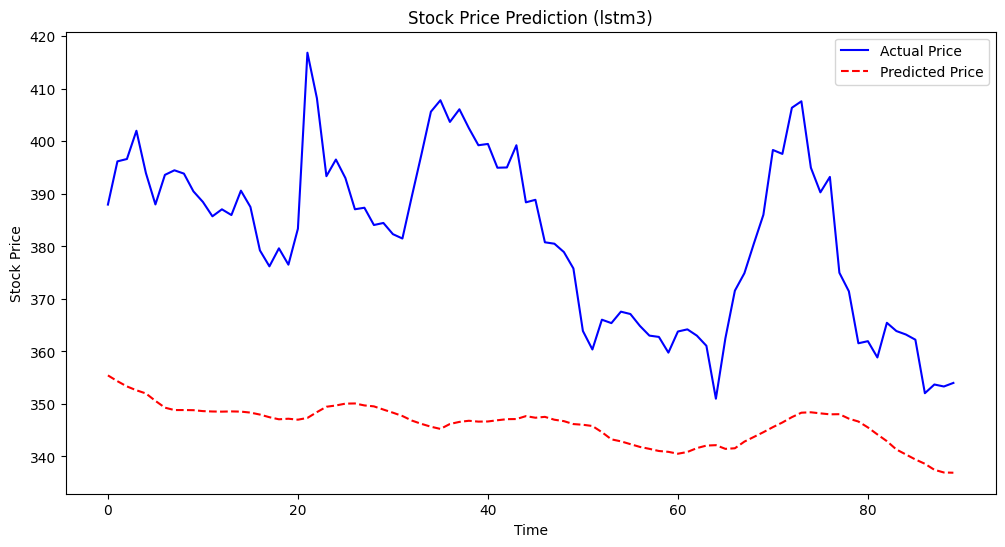


🎯 lstm3 Model Training & Prediction Complete! 🚀


In [23]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib
import json
import keras_tuner as kt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# === Define Model Save Path ===
lstm_folder = "lstm3"
os.makedirs(lstm_folder, exist_ok=True)

# === Step 1: Load Preprocessed Data ===
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

# Load the correct scaler for stock prices
scaler_y = joblib.load("scaler_y.pkl")

print(f"✅ Data Loaded: X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"✅ X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# === Step 2: Hyperparameter Tuning ===
def build_lstm_model(hp):
    """Builds an advanced LSTM model with deeper layers and a learning rate scheduler."""
    inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

    # First Bidirectional LSTM Layer
    lstm = Bidirectional(LSTM(units=hp.Choice('lstm_units_1', [100, 125, 150]), return_sequences=True))(inputs)
    lstm = BatchNormalization()(lstm)
    lstm = Dropout(hp.Choice('dropout_rate_1', [0.2, 0.3, 0.4]))(lstm)

    # Second Bidirectional LSTM Layer
    lstm = Bidirectional(LSTM(units=hp.Choice('lstm_units_2', [100, 125, 150]), return_sequences=True))(lstm)
    lstm = BatchNormalization()(lstm)
    lstm = Dropout(hp.Choice('dropout_rate_2', [0.2, 0.3, 0.4]))(lstm)

    # Third Bidirectional LSTM Layer (Extra Depth for Performance)
    lstm = Bidirectional(LSTM(units=hp.Choice('lstm_units_3', [100, 125, 150])))(lstm)
    lstm = BatchNormalization()(lstm)
    lstm = Dropout(hp.Choice('dropout_rate_3', [0.2, 0.3, 0.4]))(lstm)

    # Fully Connected Layers
    dense = Dense(units=hp.Choice('dense_units_1', [128, 256]), activation="relu")(lstm)
    dense = Dropout(hp.Choice('dropout_rate_dense_1', [0.2, 0.3]))(dense)

    dense = Dense(units=hp.Choice('dense_units_2', [64, 128]), activation="relu")(dense)
    dense = Dropout(hp.Choice('dropout_rate_dense_2', [0.2, 0.3]))(dense)

    # Output Layer
    output = Dense(1)(dense)

    # Compile Model
    model = Model(inputs, output)
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss="mse",
        metrics=["mae"]
    )
    return model

# ✅ Run More Trials for Better Tuning
tuner = kt.RandomSearch(
    build_lstm_model,
    objective="val_loss",
    max_trials=20,  # Increased trials for better accuracy
    executions_per_trial=3,  # More executions for stability
    directory=os.path.join(lstm_folder, "tuning"),
    project_name="stock_prediction"
)

# ✅ Perform Hyperparameter Search
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

# ✅ Get Best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# ✅ Save Best Hyperparameters in `lstm3/`
best_hps_dict = {param: best_hps.get(param) for param in best_hps.values.keys()}
with open(os.path.join(lstm_folder, "best_hyperparameters.json"), "w") as f:
    json.dump(best_hps_dict, f)
print(f"✅ Best hyperparameters saved in {lstm_folder}!")

# ✅ Set Batch Size
BATCH_SIZE = 32  # Increased batch size for performance

# === Step 3: Train the Best Model with Early Stopping & Learning Rate Scheduler ===
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    X_train, y_train,
    epochs=350,  # Train longer for improved learning
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test),
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# ✅ Save the Best Model in `lstm3/`
best_model.save(os.path.join(lstm_folder, "best_lstm_model.keras"))
print(f"✅ Best LSTM Model saved in {lstm_folder}!")

# === Step 4: Evaluate the Model ===
loss, mae = best_model.evaluate(X_test, y_test)
print(f"✅ Best Model Test Loss: {loss}")
print(f"✅ Best Model Test MAE: {mae}")

# === Step 5: Make Predictions ===
predictions = best_model.predict(X_test)

# === Step 6: Reverse Scale Predictions and Actual Values ===
def inverse_transform_single_feature(scaler, data):
    """Properly inverse transforms a single feature using the original scaler."""
    data = np.array(data).reshape(-1, 1)
    return scaler.inverse_transform(data)

# ✅ Rescale Predictions and Actual Prices
predictions_rescaled = inverse_transform_single_feature(scaler_y, predictions)
y_test_rescaled = inverse_transform_single_feature(scaler_y, y_test)

# === Step 7: Plot Predicted vs. Actual Prices ===
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Price", color="blue")
plt.plot(predictions_rescaled, label="Predicted Price", color="red", linestyle="dashed")
plt.title(f"Stock Price Prediction ({lstm_folder})")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

print(f"\n🎯 {lstm_folder} Model Training & Prediction Complete! 🚀")


# Ensemble Models

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib
import json
import keras_tuner as kt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# === Define Model Save Path ===
model_folder = "LstmCnn"
os.makedirs(model_folder, exist_ok=True)

# === Step 1: Load Preprocessed Data ===
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

# Load the correct scaler for stock prices
scaler_y = joblib.load("scaler_y.pkl")

print(f"✅ Data Loaded: X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"✅ X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# === Step 2: Hyperparameter Tuning ===
def build_model(hp):
    """Builds an LSTM + CNN model with hyperparameter tuning."""
    inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

    # CNN Branch
    cnn = Conv1D(filters=hp.Choice('cnn_filters', [32, 64, 128]), kernel_size=3, activation='relu')(inputs)
    cnn = MaxPooling1D(pool_size=2)(cnn)
    cnn = Flatten()(cnn)

    # LSTM Branch
    lstm = LSTM(units=hp.Choice('lstm_units', [50, 75, 100]), return_sequences=True)(inputs)
    lstm = LSTM(units=hp.Choice('lstm_units_2', [50, 75, 100]))(lstm)

    # Merge CNN and LSTM branches
    merged = Concatenate()([cnn, lstm])
    merged = Dense(units=hp.Choice('dense_units', [50, 100, 150]), activation="relu")(merged)
    merged = Dropout(hp.Choice('dropout_rate', [0.1, 0.2, 0.3]))(merged)

    # Output Layer
    output = Dense(1)(merged)

    # Compile Model
    model = Model(inputs, output)
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss="mse",
        metrics=["mae"]
    )
    return model

# ✅ Run Hyperparameter Tuning
tuner = kt.RandomSearch(
    build_model,
    objective="val_loss",
    max_trials=15,  # More trials for better tuning
    executions_per_trial=3,  # More executions for stability
    directory=os.path.join(model_folder, "tuning"),
    project_name="stock_prediction_LstmCnn"
)

tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

# ✅ Get Best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# ✅ Save Best Hyperparameters
best_hps_dict = {param: best_hps.get(param) for param in best_hps.values.keys()}
with open(os.path.join(model_folder, "best_hyperparameters.json"), "w") as f:
    json.dump(best_hps_dict, f)
print(f"✅ Best hyperparameters saved in {model_folder}!")

# ✅ Set Batch Size
BATCH_SIZE = 16  # Keep batch size small for better weight updates

# === Step 3: Train the Best Model with Early Stopping ===
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    X_train, y_train,
    epochs=300,
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# ✅ Save the Best Model
best_model.save(os.path.join(model_folder, "best_lstm_cnn_model.keras"))
print(f"✅ Best LSTM + CNN Model saved in {model_folder}!")

# === Step 4: Evaluate the Model ===
loss, mae = best_model.evaluate(X_test, y_test)
print(f"✅ Best Model Test Loss: {loss}")
print(f"✅ Best Model Test MAE: {mae}")

# === Step 5: Make Predictions ===
predictions = best_model.predict(X_test)

# === Step 6: Reverse Scale Predictions and Actual Values ===
def inverse_transform_single_feature(scaler, data):
    """Properly inverse transforms a single feature using the original scaler."""
    data = np.array(data).reshape(-1, 1)
    return scaler.inverse_transform(data)

# ✅ Rescale Predictions and Actual Prices
predictions_rescaled = inverse_transform_single_feature(scaler_y, predictions)
y_test_rescaled = inverse_transform_single_feature(scaler_y, y_test)

# === Step 7: Plot Predicted vs. Actual Prices ===
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Price", color="blue")
plt.plot(predictions_rescaled, label="Predicted Price", color="red", linestyle="dashed")
plt.title(f"Stock Price Prediction ({model_folder})")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

print(f"\n🎯 {model_folder} Model Training & Prediction Complete! 🚀")


✅ Data Loaded: X_train shape: (146, 50, 15), y_train shape: (146,)
✅ X_test shape: (37, 50, 15), y_test shape: (37,)
Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 158ms/step - loss: 0.2147 - mae: 0.3576 - val_loss: 0.0190 - val_mae: 0.1124
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 0.0509 - mae: 0.1841 - val_loss: 0.0644 - val_mae: 0.2404
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 0.0375 - mae: 0.1469 - val_loss: 0.0287 - val_mae: 0.1465
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 207ms/step - loss: 0.0273 - mae: 0.1283 - val_loss: 0.0099 - val_mae: 0.0814
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0249 - mae: 0.1255 - val_loss: 0.0267 - val_mae: 0.1455
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0199 - mae: 0.1095 - val_loss: 0.0085 - val_mae: 0.0796
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0183 - mae: 0.1036 - val_loss: 0.0192 - val_mae: 0.1250
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step -

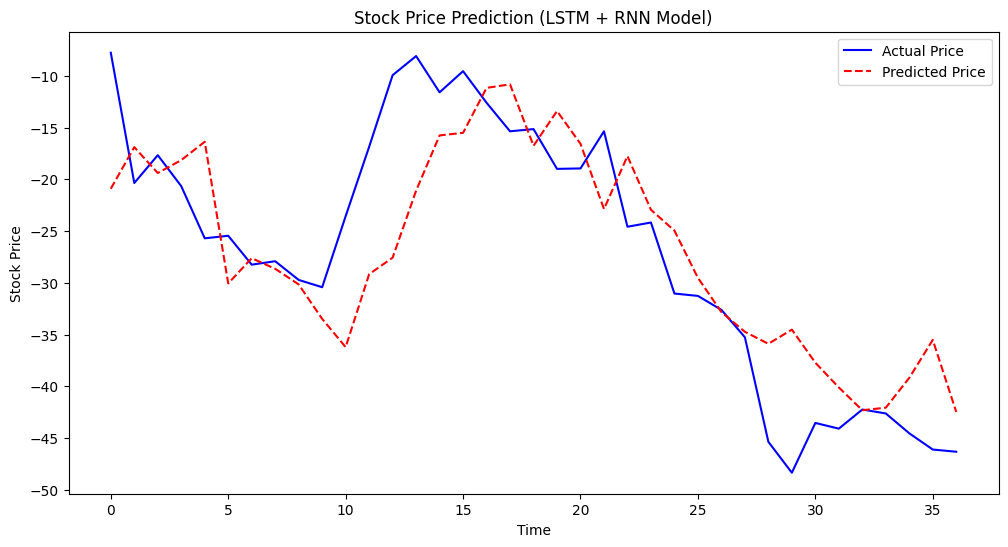


🎯 LSTM + RNN Model Training & Prediction Complete! 🚀


In [ ]:
#LSTM + RNN
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib
import json
import os
import keras_tuner as kt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, SimpleRNN, LSTM, Dense, Dropout, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

# === Step 1: Load Preprocessed Data ===
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

# Load Scaler
scaler = joblib.load("scaler.pkl")

print(f"✅ Data Loaded: X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"✅ X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# === Step 2: Build and Train Model ===
def build_model():
    """Builds an LSTM + RNN model."""
    inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

    # RNN Branch
    rnn = SimpleRNN(units=75, return_sequences=True)(inputs)
    rnn = SimpleRNN(units=75)(rnn)

    # LSTM Branch
    lstm = LSTM(units=75, return_sequences=True)(inputs)
    lstm = LSTM(units=75)(lstm)

    # Merge RNN and LSTM branches
    merged = Concatenate()([rnn, lstm])
    merged = Dense(50, activation="relu")(merged)
    merged = Dropout(0.2)(merged)

    # Output Layer
    output = Dense(1)(merged)

    # Compile Model
    model = Model(inputs, output)
    model.compile(
        optimizer=Adam(learning_rate=0.0005),
        loss="mse",
        metrics=["mae"]
    )
    return model

# ✅ Train Model
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model = build_model()
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# ✅ Save the Best Model
model.save("best_lstm_rnn_model.keras")
print("✅ Best LSTM + RNN Model saved!")

# === Step 3: Evaluate the Model ===
loss, mae = model.evaluate(X_test, y_test)
print(f"✅ Model Test Loss: {loss}")
print(f"✅ Model Test MAE: {mae}")

# === Step 4: Make Predictions ===
predictions = model.predict(X_test)

# === Step 5: Reverse Scale Predictions and Actual Values ===
def inverse_transform_single_feature(scaler, data, feature_index=-1):
    expected_features = scaler.min_.shape[0]
    dummy = np.zeros((data.shape[0], expected_features))
    dummy[:, feature_index] = data.flatten()
    return scaler.inverse_transform(dummy)[:, feature_index]

feature_index = -1
predictions_rescaled = inverse_transform_single_feature(scaler, predictions, feature_index)
y_test_rescaled = inverse_transform_single_feature(scaler, y_test.reshape(-1, 1), feature_index)

# === Step 6: Plot Predicted vs. Actual Prices ===
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Price", color="blue")
plt.plot(predictions_rescaled, label="Predicted Price", color="red", linestyle="dashed")
plt.title("Stock Price Prediction (LSTM + RNN Model)")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

print("\n🎯 LSTM + RNN Model Training & Prediction Complete! 🚀")


Trial 10 Complete [00h 01m 03s]
val_loss: 0.00792448758147657

Best val_loss So Far: 0.004126881714910269
Total elapsed time: 00h 10m 46s
Results summary
Results in ensemble_tuning/stock_prediction_ensemble
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 04 summary
Hyperparameters:
cnn_filters: 64
rnn_units: 100
rnn_units_2: 100
lstm_units: 50
lstm_units_2: 100
dropout_rate: 0.2
learning_rate: 0.0005
Score: 0.004126881714910269

Trial 03 summary
Hyperparameters:
cnn_filters: 64
rnn_units: 75
rnn_units_2: 50
lstm_units: 75
lstm_units_2: 75
dropout_rate: 0.1
learning_rate: 0.001
Score: 0.005385397467762232

Trial 07 summary
Hyperparameters:
cnn_filters: 128
rnn_units: 75
rnn_units_2: 100
lstm_units: 50
lstm_units_2: 50
dropout_rate: 0.1
learning_rate: 0.0005
Score: 0.005943761207163334

Trial 08 summary
Hyperparameters:
cnn_filters: 64
rnn_units: 75
rnn_units_2: 75
lstm_units: 100
lstm_units_2: 75
dropout_rate: 0.1
learning_rate: 0.0005
Score: 0.0075133712962269

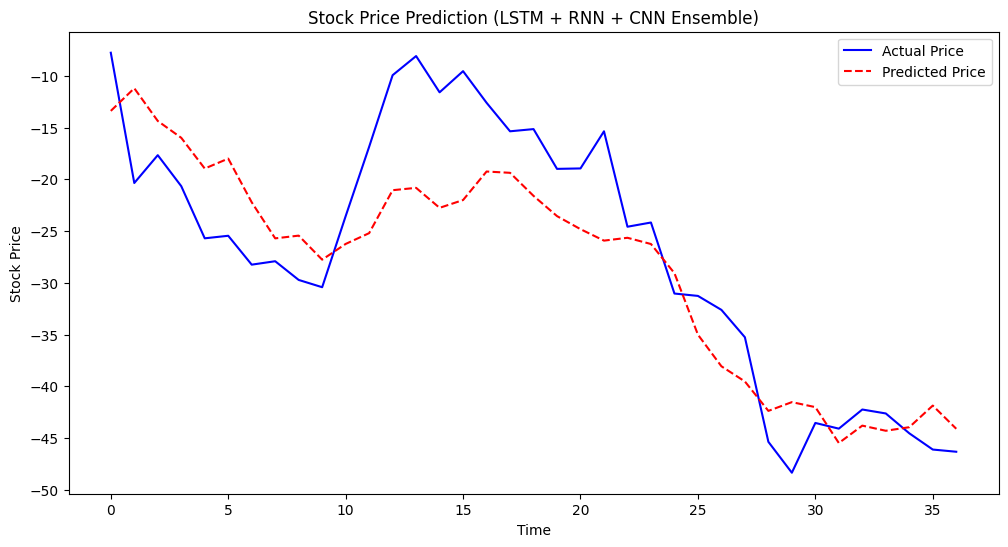


🎯 Ensemble Model Training & Prediction Complete! 🚀


In [ ]:
#Ensemble model test with LSTM RNN and CNN
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib
import json
import os
import keras_tuner as kt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, SimpleRNN, LSTM, Conv1D, Dense, Dropout, Flatten, Concatenate, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

# === Step 1: Load Preprocessed Data ===
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

# Load Scaler
scaler = joblib.load("scaler.pkl")

print(f"✅ Data Loaded: X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"✅ X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# ✅ Remove previous tuning directory if needed
if os.path.exists("ensemble_tuning/stock_prediction"):
    print("🔄 Removing previous tuner files...")
    os.system("rm -rf ensemble_tuning/stock_prediction")

# === Step 2: Hyperparameter Tuning ===
def build_ensemble_model(hp):
    """Builds an ensemble model with CNN, RNN, and LSTM."""
    inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

    # CNN Branch
    cnn = Conv1D(filters=hp.Choice('cnn_filters', [32, 64, 128]), kernel_size=3, activation='relu')(inputs)
    cnn = MaxPooling1D(pool_size=2)(cnn)
    cnn = Flatten()(cnn)

    # RNN Branch
    rnn = SimpleRNN(units=hp.Choice('rnn_units', [50, 75, 100]), return_sequences=True)(inputs)
    rnn = SimpleRNN(units=hp.Choice('rnn_units_2', [50, 75, 100]))(rnn)

    # LSTM Branch
    lstm = LSTM(units=hp.Choice('lstm_units', [50, 75, 100]), return_sequences=True)(inputs)
    lstm = LSTM(units=hp.Choice('lstm_units_2', [50, 75, 100]))(lstm)

    # Merge all branches
    merged = Concatenate()([cnn, rnn, lstm])
    merged = Dense(50, activation="relu")(merged)
    merged = Dropout(hp.Choice('dropout_rate', [0.1, 0.2, 0.3]))(merged)

    # Output Layer
    output = Dense(1)(merged)

    # Compile Model
    model = Model(inputs, output)
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss="mse",
        metrics=["mae"]
    )
    return model

# ✅ Run Hyperparameter Tuning
tuner = kt.RandomSearch(
    build_ensemble_model,
    objective="val_loss",
    max_trials=10,
    executions_per_trial=2,
    directory="ensemble_tuning",
    project_name="stock_prediction_ensemble"
)

tuner.search(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1)

tuner.results_summary()

# ✅ Get Best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# ✅ Save Best Hyperparameters
best_hps_dict = {param: best_hps.get(param) for param in best_hps.values.keys()}
with open("best_hyperparameters_ensemble.json", "w") as f:
    json.dump(best_hps_dict, f)
print("✅ Best hyperparameters saved!")

# === Step 3: Train the Best Model ===
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# ✅ Save the Best Model
best_model.save("best_ensemble_model.keras")
print("✅ Best Ensemble Model saved!")

# === Step 4: Evaluate the Model ===
loss, mae = best_model.evaluate(X_test, y_test)
print(f"✅ Best Model Test Loss: {loss}")
print(f"✅ Best Model Test MAE: {mae}")

# === Step 5: Make Predictions ===
predictions = best_model.predict(X_test)

# === Step 6: Reverse Scale Predictions and Actual Values ===
def inverse_transform_single_feature(scaler, data, feature_index=-1):
    expected_features = scaler.min_.shape[0]
    dummy = np.zeros((data.shape[0], expected_features))
    dummy[:, feature_index] = data.flatten()
    return scaler.inverse_transform(dummy)[:, feature_index]

feature_index = -1
predictions_rescaled = inverse_transform_single_feature(scaler, predictions, feature_index)
y_test_rescaled = inverse_transform_single_feature(scaler, y_test.reshape(-1, 1), feature_index)

# === Step 7: Plot Predicted vs. Actual Prices ===
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Price", color="blue")
plt.plot(predictions_rescaled, label="Predicted Price", color="red", linestyle="dashed")
plt.title("Stock Price Prediction (LSTM + RNN + CNN Ensemble)")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

print("\n🎯 Ensemble Model Training & Prediction Complete! 🚀")


ENSEMBLE MODEL FROM BEST CNN RNN AND LSTM

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib
import json
import keras_tuner as kt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, SimpleRNN, LSTM, Dense, Dropout, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# === Define Model Save Path ===
ensemble_folder = "EnsembleModel"
os.makedirs(ensemble_folder, exist_ok=True)

# === Step 1: Load Preprocessed Data ===
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

# Load the correct scaler for stock prices
scaler_y = joblib.load("scaler_y.pkl")

print(f"✅ Data Loaded: X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"✅ X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# === Step 2: Hyperparameter Tuning ===
def build_ensemble_model(hp):
    """Builds an Ensemble Model combining CNN, RNN, and LSTM branches."""

    inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

    # CNN Branch
    cnn = Conv1D(filters=hp.Choice('cnn_filters', [64, 128, 256]), kernel_size=hp.Choice('cnn_kernel_size', [3, 5, 7]), activation='relu')(inputs)
    cnn = MaxPooling1D(pool_size=2)(cnn)
    cnn = Flatten()(cnn)

    # RNN Branch
    rnn = SimpleRNN(units=hp.Choice('rnn_units', [75, 100, 125]), return_sequences=True)(inputs)
    rnn = SimpleRNN(units=hp.Choice('rnn_units_2', [75, 100, 125]))(rnn)

    # LSTM Branch
    lstm = LSTM(units=hp.Choice('lstm_units', [50, 75, 100]), return_sequences=True)(inputs)
    lstm = LSTM(units=hp.Choice('lstm_units_2', [50, 75, 100]))(lstm)

    # Merge CNN, RNN, and LSTM branches
    merged = Concatenate()([cnn, rnn, lstm])
    merged = Dense(units=hp.Choice('dense_units', [50, 100, 150]), activation="relu")(merged)
    merged = Dropout(hp.Choice('dropout_rate', [0.1, 0.2, 0.3]))(merged)

    # Output Layer
    output = Dense(1)(merged)

    # Compile Model
    model = Model(inputs, output)
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss="mse",
        metrics=["mae"]
    )
    return model

# ✅ Run Hyperparameter Tuning
tuner = kt.RandomSearch(
    build_ensemble_model,
    objective="val_loss",
    max_trials=15,  # More trials for better tuning
    executions_per_trial=3,  # More executions for stability
    directory=os.path.join(ensemble_folder, "tuning"),
    project_name="stock_prediction_ensemble"
)

tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

# ✅ Get Best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# ✅ Save Best Hyperparameters
best_hps_dict = {param: best_hps.get(param) for param in best_hps.values.keys()}
with open(os.path.join(ensemble_folder, "best_hyperparameters.json"), "w") as f:
    json.dump(best_hps_dict, f)
print(f"✅ Best hyperparameters saved in {ensemble_folder}!")

# ✅ Set Batch Size
BATCH_SIZE = 16  # Keep batch size small for better weight updates

# === Step 3: Train the Best Model with Early Stopping ===
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    X_train, y_train,
    epochs=500,  # No early stopping to ensure full training
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test),
    verbose=1
)

# ✅ Save the Best Model
best_model.save(os.path.join(ensemble_folder, "best_ensemble_model.keras"))
print(f"✅ Best Ensemble Model saved in {ensemble_folder}!")

# === Step 4: Evaluate the Model ===
loss, mae = best_model.evaluate(X_test, y_test)
print(f"✅ Best Model Test Loss: {loss}")
print(f"✅ Best Model Test MAE: {mae}")

# === Step 5: Make Predictions ===
predictions = best_model.predict(X_test)

# === Step 6: Reverse Scale Predictions and Actual Values ===
def inverse_transform_single_feature(scaler, data):
    """Properly inverse transforms a single feature using the original scaler."""
    data = np.array(data).reshape(-1, 1)
    return scaler.inverse_transform(data)

# ✅ Rescale Predictions and Actual Prices
predictions_rescaled = inverse_transform_single_feature(scaler_y, predictions)
y_test_rescaled = inverse_transform_single_feature(scaler_y, y_test)

# === Step 7: Plot Predicted vs. Actual Prices ===
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Price", color="blue")
plt.plot(predictions_rescaled, label="Predicted Price", color="red", linestyle="dashed")
plt.title(f"Stock Price Prediction ({ensemble_folder})")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

print(f"\n🎯 {ensemble_folder} Model Training & Prediction Complete! 🚀")
